In [31]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.rename(columns={"listed_in":"category"},
          inplace = True)

In [6]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
df.shape

(8790, 10)

In [8]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   category      8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'category'],
      dtype='object')

In [13]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
category        0
dtype: int64

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
category        0
dtype: int64

In [15]:
df.duplicated().value_counts()

False    8790
dtype: int64

In [16]:
for col in df.columns:
    print(col)
    print("**"*10)
    print(df[col].value_counts())

show_id
********************
s1       1
s7990    1
s7982    1
s7984    1
s7986    1
        ..
s3960    1
s3958    1
s3956    1
s3955    1
s8786    1
Name: show_id, Length: 8790, dtype: int64
type
********************
Movie      6126
TV Show    2664
Name: type, dtype: int64
title
********************
9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64
director
********************
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                  

In [17]:
df[df.director == "Not Given"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,9/17/2021,2021,TV-MA,1 Season,TV Comedies
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [18]:
df[df.country == "Not Given"]

,show_id,type,title,director,country,date_added,release_year,rating,duration,category
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,1/1/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,9/1/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,8/9/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


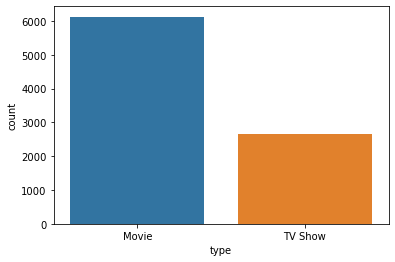

In [20]:
sns.countplot(data=df,x="type");

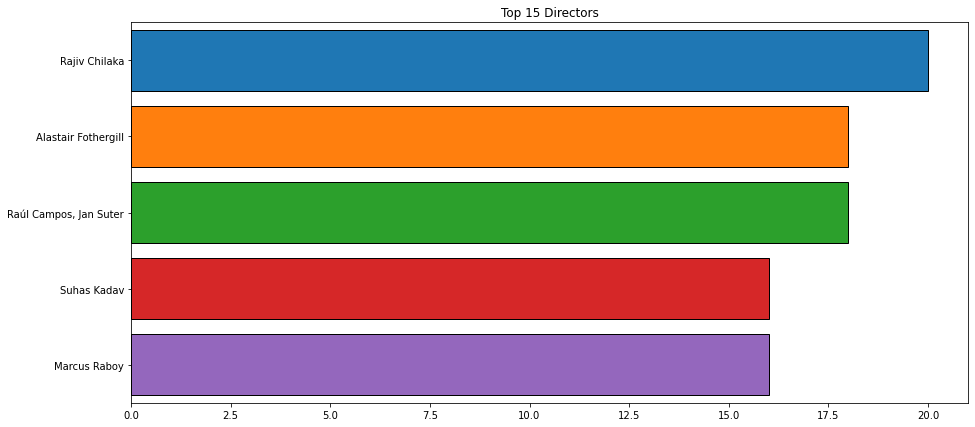

In [29]:
plt.figure(figsize = (15,7))
top_15 = df['director'].value_counts().drop('Not Given').head()
sns.barplot(x = top_15.values,
            y = top_15.index,
            edgecolor = 'k',
            linewidth = 1,
            saturation = 1)

plt.title("Top 15 Directors")
plt.show()

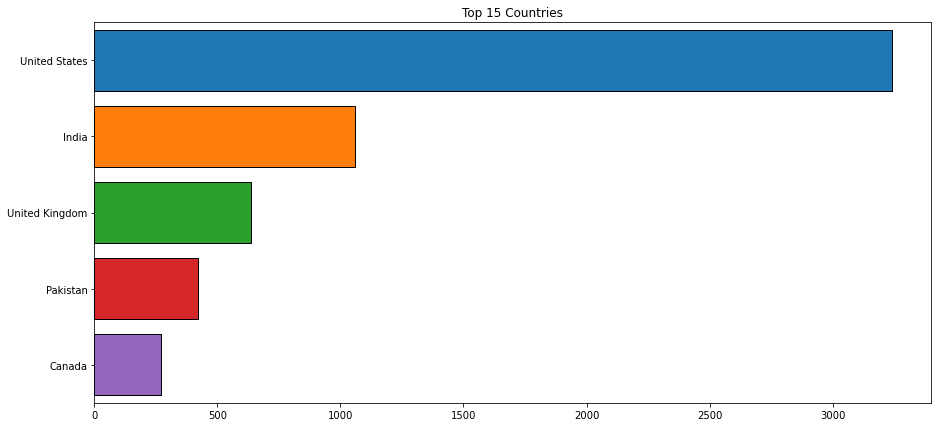

In [30]:
plt.figure(figsize = (15,7))
top_15 = df['country'].value_counts().drop('Not Given').head()
sns.barplot(x = top_15.values, y  = top_15.index , edgecolor = 'k', linewidth = 1, saturation = 1)
plt.title("Top 15 Countries")
plt.show()

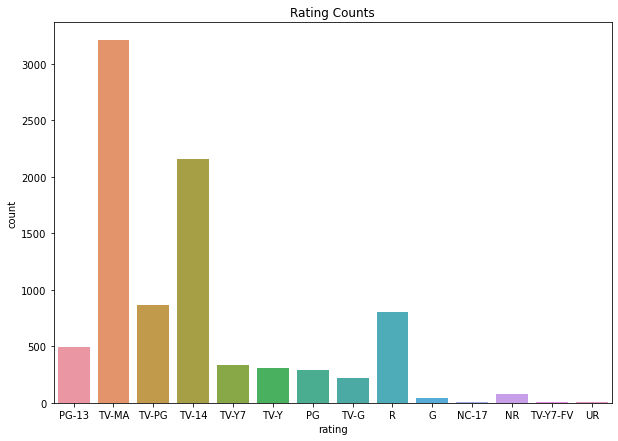

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(df["rating"])
plt.title("Rating Counts")
plt.show()

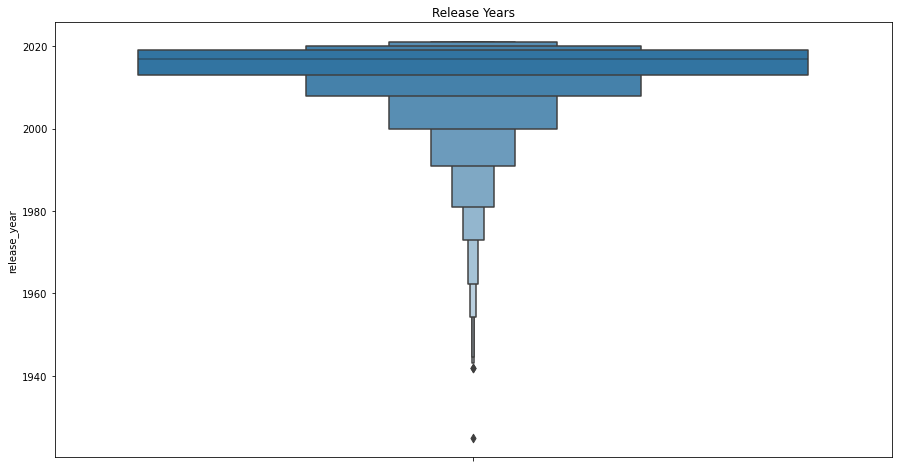

In [35]:
plt.figure(figsize = (15,8))
sns.boxenplot(y = df['release_year'])
plt.title("Release Years");

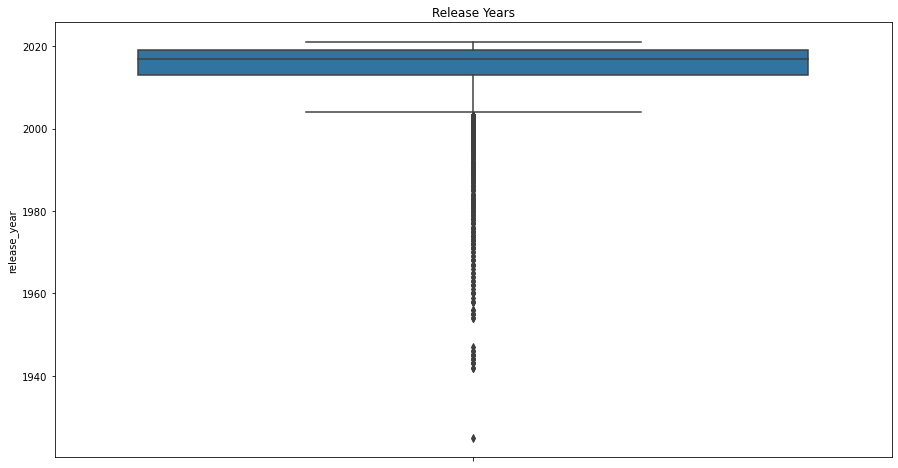

In [36]:
plt.figure(figsize = (15,8))
sns.boxplot(y = df['release_year'])
plt.title("Release Years");

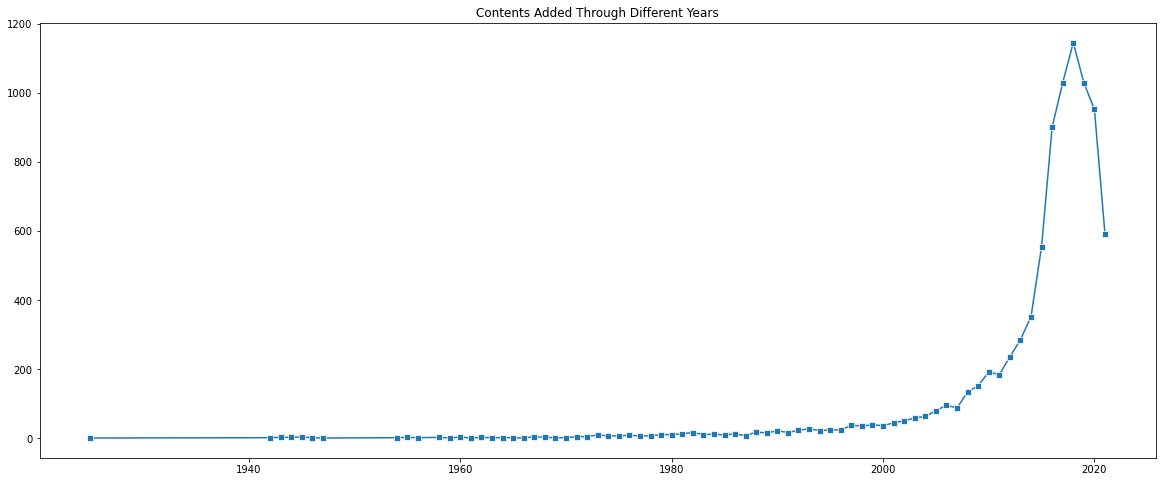

In [39]:
plt.figure(figsize = (20,8))
sns.lineplot(x = df['release_year'].value_counts().index,
             y = df['release_year'].value_counts().values,
            marker = "s")
plt.title('Contents Added Through Different Years')
plt.show()